# Rapidity

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/lookbusy1344/Relativity/blob/main/Python/Rapidity.ipynb)

*Rapidity* is useful for working with relativistic velocities. It's a linear function of velocity, so you can add rapidities then convert back to velocity.

Rapidity is defined as:

\begin{equation}
\phi = \tanh^{-1} \left( \frac{v}{c} \right) \tag{1}
\end{equation}

Adding two rapidities is straightforward:

\begin{equation}
\phi_{\text{combined}} = \phi_1 + \phi_2 \tag{2}
\end{equation}

Convert the sum back to velocity:

\begin{equation}
v = c \cdot \tanh(\phi_{\text{combined}}) \tag{3}
\end{equation}

For more details see https://en.wikipedia.org/wiki/Rapidity

## Plotting rapidity and velocity

Here we plot rapidity and velocity for a range of speeds.

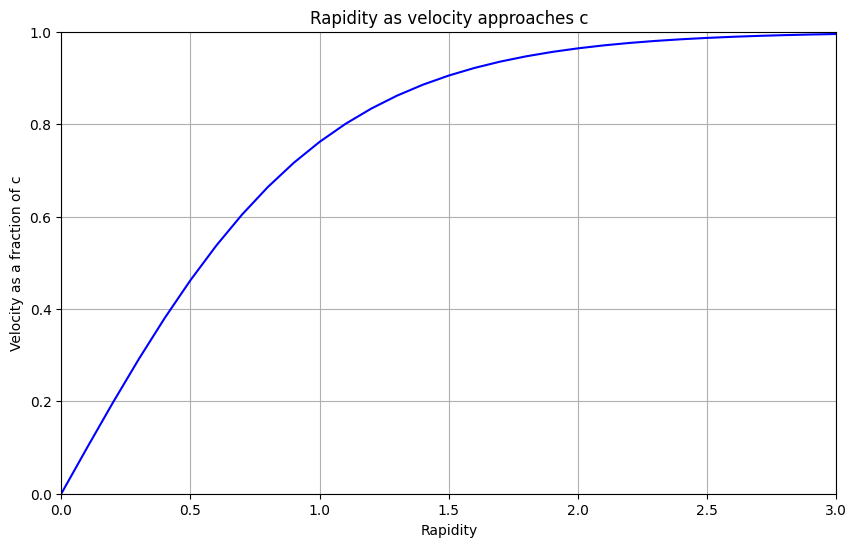

In [1]:
# Download relativity_lib.py from your GitHub repo if not present. Important for colab.
import os
if not os.path.exists("relativity_lib.py"):
    !wget -q https://raw.githubusercontent.com/lookbusy1344/Relativity/main/Python/relativity_lib.py

import matplotlib.pyplot as plt
import numpy as np
import relativity_lib as rl

rl.configure(100)  # configure for 100 decimal places

max = 3.0
# Define the rapidities from 0.01 to 4 in steps of 0.1
rapidities = np.arange(0.0, max + 0.1, 0.1)

# Calculate the corresponding velocities and fractions of c
velocities = [rl.velocity_from_rapidity(r) for r in rapidities]
fractions_of_c = [v / rl.c for v in velocities]

# Plot the data
plt.figure(figsize=(10, 6))
plt.plot(rapidities, fractions_of_c, linestyle="-", color="b")
plt.xlabel("Rapidity")
plt.ylabel("Velocity as a fraction of c")
plt.title("Rapidity as velocity approaches c")
plt.grid(True)
plt.xlim(0, max)
plt.ylim(0, 1.0)
plt.show();

## Table of rapidity and velocity


In [2]:
from prettytable import PrettyTable, TableStyle
from IPython.display import Markdown

rl.configure(100)  # configure for 100 decimal places

table = PrettyTable(
    [
        "Rapidity",
        "Velocity (m/s)",
        "Fraction of c",
    ]
)
table.set_style(TableStyle.MARKDOWN)
table.align = "r"


def add_row(rapidity):
    velocity = rl.velocity_from_rapidity(rapidity)

    fmt_rap = "{:.1f}".format(rapidity)
    fmt_vel = rl.format_mpf_significant(velocity, 2, "9")
    fmt_c = rl.format_mpf_significant(velocity / rl.c, 2, "9")

    table.add_row([fmt_rap, fmt_vel, fmt_c])


for rapidity in np.arange(0.0, 15.1, 1.0):
    add_row(rapidity)

markdown_table = table.get_string()
display(Markdown(markdown_table));

| Rapidity |     Velocity (m/s) |    Fraction of c |
|--------: |------------------: |----------------: |
|      0.0 |                0.0 |              0.0 |
|      1.0 |     228,320,184.01 |             0.76 |
|      2.0 |     289,008,197.81 |            0.964 |
|      3.0 |     298,309,910.45 |           0.9950 |
|      4.0 |     299,591,387.12 |          0.99932 |
|      5.0 |     299,765,238.12 |         0.999909 |
|      6.0 |     299,788,774.04 |         0.999987 |
|      7.0 |     299,791,959.42 |        0.9999983 |
|      8.0 |     299,792,390.52 |       0.99999977 |
|      9.0 |     299,792,448.86 |      0.999999969 |
|     10.0 |     299,792,456.76 |     0.9999999958 |
|     11.0 |     299,792,457.83 |    0.99999999944 |
|     12.0 |    299,792,457.977 |   0.999999999924 |
|     13.0 |   299,792,457.9969 |   0.999999999989 |
|     14.0 |  299,792,457.99958 |  0.9999999999986 |
|     15.0 | 299,792,457.999943 | 0.99999999999981 |

## Adding velocities - getting things ready

This block of code populates a table with various velocities and their corresponding rapidities.

In [3]:
rl.configure(200)

table = PrettyTable(
    [
        "Velocity 1 (m/s)",
        "Velocity 2 (m/s)",
        "Naive add (incorrect)",
        "Rapidity 1",
        "Rapidity 2",
        "Rap1 + Rap2",
        "Final Velocity (m/s)",
        "Fraction of c",
    ]
)
table.set_style(TableStyle.MARKDOWN)
table.align = "r"


def add_vel(velocity1, velocity2) -> None:
    velocity1 = rl.check_velocity(velocity1)
    velocity2 = rl.check_velocity(velocity2)

    # convert to rapidity
    rapidity1 = rl.rapidity_from_velocity(velocity1)
    rapidity2 = rl.rapidity_from_velocity(velocity2)

    # add rapidities, just a straight forward addition
    added_rapidity = rapidity1 + rapidity2

    # convert back to velocity
    final_velocity = rl.velocity_from_rapidity(added_rapidity)

    # format the results
    fmt_naive = rl.format_mpf(velocity1 + velocity2, 0)
    fmt_rap1 = rl.format_mpf_significant(rapidity1, 2)
    fmt_rap2 = rl.format_mpf_significant(rapidity2, 2)
    fmt_added_rap = rl.format_mpf_significant(added_rapidity, 4)
    fmt_final = rl.format_mpf_significant(final_velocity, 2, "9")
    fmt_c = rl.format_mpf_significant(final_velocity / rl.c, 2, "9")

    # add to the table
    table.add_row(
        [
            velocity1,
            velocity2,
            fmt_naive,
            fmt_rap1,
            fmt_rap2,
            fmt_added_rap,
            fmt_final,
            fmt_c,
        ]
    )

## Putting it into practice

Now we add various velocities using rapidity. Notice how low speeds add linearly, but high speeds don't.

In [4]:
add_vel(10, 20)
add_vel("10000", "20000")
add_vel("1000000", "1000000")
add_vel("10000000", "10000000")
add_vel("100000000", "100000000")
add_vel("200000000", "200000000")
add_vel("299000000", "299000000")
add_vel("299792457", "299792457")
add_vel("299792457.95", "299792457.9995")
add_vel("299792457.99995", "299792457.99999999999999")
add_vel("299792457.999999999999995", "299792457.99999999999999999999")

print("Table of velocities added (both naively and relativistically)")
markdown_table = table.get_string()
display(Markdown(markdown_table));

Table of velocities added (both naively and relativistically)


|          Velocity 1 (m/s) |               Velocity 2 (m/s) | Naive add (incorrect) |  Rapidity 1 |  Rapidity 2 |  Rap1 + Rap2 |                                      Final Velocity (m/s) |                                           Fraction of c |
|-------------------------: |------------------------------: |---------------------: |-----------: |-----------: |------------: |---------------------------------------------------------: |-------------------------------------------------------: |
|                      10.0 |                           20.0 |                    30 | 0.000000033 | 0.000000066 | 0.0000001000 |                                        29.999999999999933 |                                                    0.00 |
|                   10000.0 |                        20000.0 |                30,000 |    0.000033 |    0.000066 |    0.0001000 |                                             29,999.999933 |                                                    0.00 |
|                 1000000.0 |                      1000000.0 |             2,000,000 |      0.0033 |      0.0033 |     0.006671 |                                              1,999,977.74 |                                                    0.00 |
|                10000000.0 |                     10000000.0 |            20,000,000 |       0.033 |       0.033 |      0.06673 |                                             19,977,771.73 |                                                    0.06 |
|               100000000.0 |                    100000000.0 |           200,000,000 |        0.34 |        0.34 |       0.6936 |                                            179,975,072.54 |                                                    0.60 |
|               200000000.0 |                    200000000.0 |           400,000,000 |        0.80 |        0.80 |       1.6111 |                                            276,805,111.06 |                                                   0.923 |
|               299000000.0 |                    299000000.0 |           598,000,000 |        3.31 |        3.31 |       6.6275 |                                            299,791,407.85 |                                               0.9999964 |
|               299792457.0 |                    299792457.0 |           599,584,914 |       10.10 |       10.10 |      20.2117 |                                    299,792,457.9999999983 |                                   0.9999999999999999944 |
|              299792457.95 |                 299792457.9995 |           599,584,915 |       11.60 |       13.90 |      25.5100 |                               299,792,457.999999999999958 |                               0.99999999999999999999986 |
|           299792457.99995 |       299792457.99999999999999 |           599,584,915 |      15.057 |       26.22 |      41.2815 |                 299,792,457.99999999999999999999999999916 |                 0.9999999999999999999999999999999999972 |
| 299792457.999999999999995 | 299792457.99999999999999999999 |           599,584,915 |       26.57 |       33.13 |      59.7022 | 299,792,457.999999999999999999999999999999999999999999916 | 0.99999999999999999999999999999999999999999999999999972 |